In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from PIL import Image
from textblob import TextBlob
import re

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
import spacy
from spacy.lang.en import STOP_WORDS

In [5]:
from wordcloud import WordCloud, ImageColorGenerator

In [6]:
"""
    A function that cleans a text data
    
    Args:
    ====
    
    text (str): the text that needs cleaning
    
    Returns:
    =======
    
    The clean version of the test sent in
    """

'\n    A function that cleans a text data\n    \n    Args:\n    ====\n    \n    text (str): the text that needs cleaning\n    \n    Returns:\n    =======\n    \n    The clean version of the test sent in\n    '

In [12]:
import spacy
from spacy.lang.en import STOP_WORDS

In [8]:
english_pipeline= spacy.load('en_core_web_sm')

In [9]:
tourist_reviews=pd.read_csv('tourist_accommodation_reviews.csv', encoding='cp1252')
tourist_reviews.info()
tourist_reviews.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53644 entries, 0 to 53643
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID                     53644 non-null  object
 1   Review Date            53644 non-null  object
 2   Location               53644 non-null  object
 3   Hotel/Restaurant name  53644 non-null  object
 4   Review                 53644 non-null  object
dtypes: object(5)
memory usage: 2.0+ MB


,ID,Review Date,Location,Hotel/Restaurant name,Review
0,rn579778340,Reviewed 1 week ago,Kathu,Thong Dee The Kathu Brasserie,Just been for sunday roast lamb and beef truly...
1,rn576350875,Reviewed 3 weeks ago,Kathu,Thong Dee The Kathu Brasserie,"Quietly set off the main road, nice atmosphere..."
2,rn574921678,Reviewed 4 weeks ago,Kathu,Thong Dee The Kathu Brasserie,I made a reservation for a birthday two days i...
3,rn572905503,"Reviewed April 12, 2018",Kathu,Thong Dee The Kathu Brasserie,We visit here regularly and never fail to be i...
4,rn572364712,"Reviewed April 10, 2018",Kathu,Thong Dee The Kathu Brasserie,Visited this wonderful place on my travels and...


In [10]:
tourist_reviews

,ID,Review Date,Location,Hotel/Restaurant name,Review
0,rn579778340,Reviewed 1 week ago,Kathu,Thong Dee The Kathu Brasserie,Just been for sunday roast lamb and beef truly...
1,rn576350875,Reviewed 3 weeks ago,Kathu,Thong Dee The Kathu Brasserie,"Quietly set off the main road, nice atmosphere..."
2,rn574921678,Reviewed 4 weeks ago,Kathu,Thong Dee The Kathu Brasserie,I made a reservation for a birthday two days i...
3,rn572905503,"Reviewed April 12, 2018",Kathu,Thong Dee The Kathu Brasserie,We visit here regularly and never fail to be i...
4,rn572364712,"Reviewed April 10, 2018",Kathu,Thong Dee The Kathu Brasserie,Visited this wonderful place on my travels and...
...,...,...,...,...,...
53639,rn162368197,"Reviewed May 29, 2013",Patong,Bite in,"I love this small restaurant, for the great fo..."
53640,rn161843734,"Reviewed May 25, 2013",Patong,Bite in,We stopped at this restaurant after shopping a...
53641,rn161734077,"Reviewed May 24, 2013",Patong,Bite in,"Great times ,This is one of the best restauran..."
53642,rn161218072,"Reviewed May 19, 2013",Patong,Bite in,"Bite in, it has become my favorite restaurant ..."


In [11]:
tourist_reviews.Location.value_counts()

 Patong              16403
 Karon                5826
 Kata Beach           5752
 Rawai                3811
 Choeng Thale         3378
 Phuket Town          3356
 Kamala               3162
 Mai Khao             2372
 Cape Panwa           1500
 Chalong              1287
 Thalang District     1177
 Kathu                1078
 Nai Yang              996
 Nai Harn              881
 Bang Tao Beach        600
 Karon Beach           397
 Wichit                395
 Talat Yai             300
 Koh Kaew              293
 Kata Noi Beach        200
 Pa Khlok              100
 Ratsada                98
 Talat Nuea             97
 Nai Thon               94
 Sakhu                  91
Name: Location, dtype: int64

In [13]:
tourist_reviews.Location.value_counts().index

Index([' Patong', ' Karon', ' Kata Beach', ' Rawai', ' Choeng Thale',
       ' Phuket Town', ' Kamala', ' Mai Khao', ' Cape Panwa', ' Chalong',
       ' Thalang District', ' Kathu', ' Nai Yang', ' Nai Harn',
       ' Bang Tao Beach', ' Karon Beach', ' Wichit', ' Talat Yai', ' Koh Kaew',
       ' Kata Noi Beach', ' Pa Khlok', ' Ratsada', ' Talat Nuea', ' Nai Thon',
       ' Sakhu'],
      dtype='object')

In [14]:
location_of_interest=[' Karon']

In [15]:
hotels_in_location = tourist_reviews[tourist_reviews.Location.isin(location_of_interest)]

In [16]:
len(hotels_in_location['Hotel/Restaurant name'].value_counts().index)

59

In [17]:
## picking randomly
np.random.seed(30)
random_30_hotels=np.random.choice(hotels_in_location['Hotel/Restaurant name'].unique(), 30, replace=False)

In [18]:
final_30 = tourist_reviews[['Hotel/Restaurant name', 'Review']][tourist_reviews['Hotel/Restaurant name'].isin(random_30_hotels)]
final_30=final_30.reset_index(drop=True)
final_30

,Hotel/Restaurant name,Review
0,Nami,We followed people's reviews since they are re...
1,Nami,This was one of the first meals we had on this...
2,Nami,"Great ice cream, and a nice place to take a br..."
3,Nami,Best icecold Thai tea we could find in Karon! ...
4,Nami,"We only ate the ice cream here, but it was sim..."
...,...,...
2973,Mama Restaurant - Karon Beach,Large selection of food.\r\nNice feel about th...
2974,Mama Restaurant - Karon Beach,"Great food- we went with Thai food, modern, ta..."
2975,Mama Restaurant - Karon Beach,We hadn't planned on eating here as it didn't ...
2976,Mama Restaurant - Karon Beach,The food here is really good! Lovely people an...


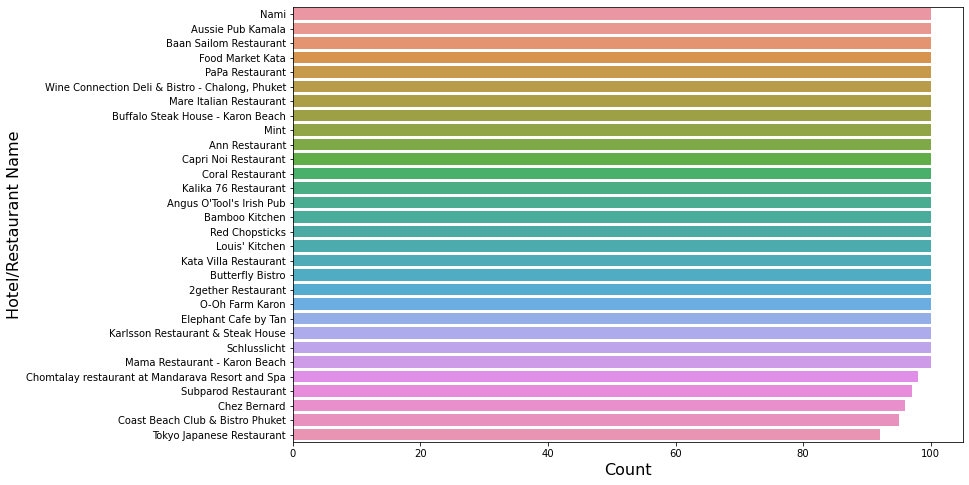

In [19]:
plt.figure(figsize=(12, 8))
sns.countplot(y='Hotel/Restaurant name', data=final_30,
              order=final_30['Hotel/Restaurant name'].value_counts().index)
plt.ylabel('Hotel/Restaurant Name', fontsize=16)
plt.xlabel('Count', fontsize=16)
plt.show()

DATA CLEANING PROCESS

In [20]:
tourist_reviews.Review.iloc[159]

'Very hospitable and desperate chief. Small green corner in hot Thai! <U+041E><U+0447><U+0435><U+043D><U+044C> <U+0432><U+0435><U+0441><U+0435><U+043B><U+044B><U+0439> <U+0438> <U+043E><U+0442><U+0447><U+0430><U+044F><U+043D><U+043D><U+044B><U+0439> <U+0445><U+043E><U+0437><U+044F><U+0438><U+043D>. <U+041C><U+0430><U+043B><U+0435><U+043D><U+044C><U+043A><U+0438><U+0439> <U+0443><U+0433><U+043E><U+043B><U+043E><U+043A> <U+0413><U+0440><U+0435><U+0446><U+0438><U+0438> <U+0432> <U+0436><U+0430><U+0440><U+043A><U+043E><U+043C> <U+0422><U+0430><U+0438><U+043B><U+0430><U+043D><U+0434><U+0435>.'

In [21]:
end_result=re.compile('[a-zA-Z]+')

' '.join(re.findall('[a-zA-Z]+', tourist_reviews.Review.iloc[159]))

'Very hospitable and desperate chief Small green corner in hot Thai U E U U U D U C U U U U U B U B U U U E U U U U F U D U D U B U U U E U U F U U D U C U U B U U D U C U A U U U U U E U B U E U A U U U U U U U U U U U A U E U C U U U U B U U D U U'

In [22]:
cleaned=' '.join([c for c in re.findall('[a-zA-Z]+', tourist_reviews.Review.iloc[159]) if len(c) >1])
cleaned

'Very hospitable and desperate chief Small green corner in hot Thai'

In [26]:
' '.join([word.lemma_ for word in  english_pipeline(cleaned)])

'very hospitable and desperate chief small green corner in hot Thai'

In [27]:
"""
    A functon that cleans a text data
    
    Args:
    ====
    
    text (str): the text that needs cleaning
    
    Returns:
    =======
    
    The clean version of the test sent in
    """

'\n    A functon that cleans a text data\n    \n    Args:\n    ====\n    \n    text (str): the text that needs cleaning\n    \n    Returns:\n    =======\n    \n    The clean version of the test sent in\n    '

In [28]:
def lemmatizer(text):
    return [word.lemma_ for word in  english_pipeline(text)]


def data_cleaner(text: str) -> str:
        
    text=re.findall('[a-zA-Z]+', text) ## extract only alphabets
    text=' '.join([c for c in text if len(c) >1]) ## join after extracting the alphabets
    text=text.lower() ## convert texts to lower case
    text = ' '.join([word for word in text.split() if word not in STOP_WORDS])
    lemmatized = lemmatizer(text)
    cleaned= ' '.join(lemmatized)
    
    return cleaned

In [29]:
data_cleaner(tourist_reviews.Review.iloc[159])

'hospitable desperate chief small green corner hot thai'

In [30]:
final_30.loc[:, 'Clean_Reviews'] = final_30.loc[:, 'Review'].apply(data_cleaner)

In [31]:
final_30.head()

,Hotel/Restaurant name,Review,Clean_Reviews
0,Nami,We followed people's reviews since they are re...,follow people review reliable time book syst d...
1,Nami,This was one of the first meals we had on this...,meal trip disappoint visit karon nami small ic...
2,Nami,"Great ice cream, and a nice place to take a br...",great ice cream nice place break aircon waitre...
3,Nami,Best icecold Thai tea we could find in Karon! ...,good icecold thai tea find karon delicious nic...
4,Nami,"We only ate the ice cream here, but it was sim...",eat ice cream simply scrumptious need cool tre...


In [32]:
cv=CountVectorizer(stop_words='english')
data_cv=cv.fit_transform(final_30['Clean_Reviews'])

In [33]:
data_cv

<2978x4162 sparse matrix of type '<class 'numpy.int64'>'
	with 48521 stored elements in Compressed Sparse Row format>

In [34]:
df2=pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
df2.head()

,aber,abit,able,abound,absolute,absolutely,abundance,abysmal,ac,accept,...,yp,yr,yrs,yum,yummmm,yummo,yummy,yun,zealand,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
df2.sum(axis=0).sort_values(ascending=False)

food              2054
good              1521
restaurant        1002
great              938
service            814
                  ... 
intensity            1
intention            1
interaction          1
interpretation       1
limoncello           1
Length: 4162, dtype: int64

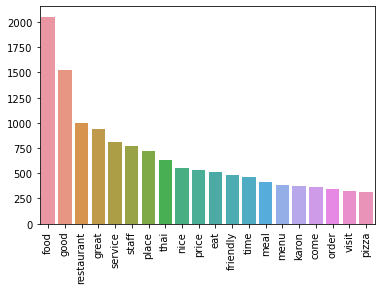

In [45]:
top20=df2.sum(axis=0).sort_values(ascending=False)[:20]

sns.barplot(x=top20.index, y=top20.values)
plt.xticks(rotation=90)
plt.show()

# Generate a word cloud

In [36]:
text=' '.join(text for text in final_30.Clean_Reviews)

In [37]:
def plot_cloud(word_cloud):
    
    plt.figure(figsize=(15,9))
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

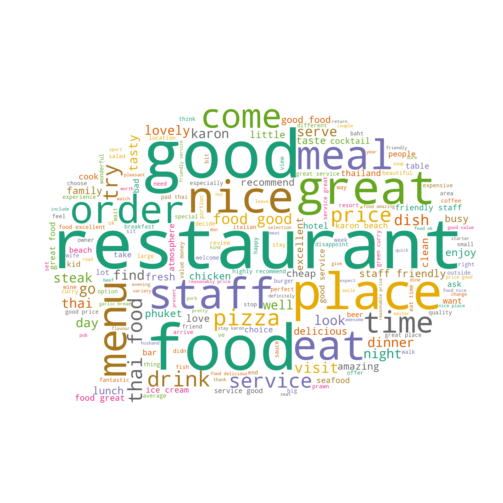

In [38]:
comment=np.array(Image.open('comment.png'))
wc=WordCloud(background_color='white', 
             colormap='Dark2', random_state=42, collocations=True, mask=comment).generate(text)
plot_cloud(wc)

# Sentiment Analysis

In [46]:
ploarity= lambda review: TextBlob(review).sentiment.polarity
subjectivity= lambda review: TextBlob(review).sentiment.subjectivity

In [47]:
final_30.loc[:, 'polarity']=final_30.loc[:, 'Clean_Reviews'].apply(ploarity)
final_30.loc[:, 'subjectivity']=final_30.loc[:, 'Clean_Reviews'].apply(subjectivity)

In [48]:
final_30['Classification'] = 'Neutral'
final_30['Classification'] = np.where(final_30['polarity'] >= 0.05, 'positive', final_30['Classification'])
final_30['Classification'] = np.where(final_30['polarity'] <= -0.05,'negative', final_30['Classification'])

In [49]:
final_30.head()

,Hotel/Restaurant name,Review,Clean_Reviews,Classification,polarity,subjectivity
0,Nami,We followed people's reviews since they are re...,follow people review reliable time book syst d...,negative,-0.158333,0.416667
1,Nami,This was one of the first meals we had on this...,meal trip disappoint visit karon nami small ic...,positive,0.083333,0.516667
2,Nami,"Great ice cream, and a nice place to take a br...",great ice cream nice place break aircon waitre...,positive,0.711111,0.905556
3,Nami,Best icecold Thai tea we could find in Karon! ...,good icecold thai tea find karon delicious nic...,positive,0.575000,0.650000
4,Nami,"We only ate the ice cream here, but it was sim...",eat ice cream simply scrumptious need cool tre...,positive,0.170000,0.515714


In [50]:
final_30.Classification.value_counts()

positive    2594
negative     215
Neutral      169
Name: Classification, dtype: int64

In [51]:
final_30.Classification.value_counts(normalize=True)

positive    0.871054
negative    0.072196
Neutral     0.056749
Name: Classification, dtype: float64

In [52]:
final_30['Classification']

0       negative
1       positive
2       positive
3       positive
4       positive
          ...   
2973    positive
2974    positive
2975    positive
2976    positive
2977     Neutral
Name: Classification, Length: 2978, dtype: object

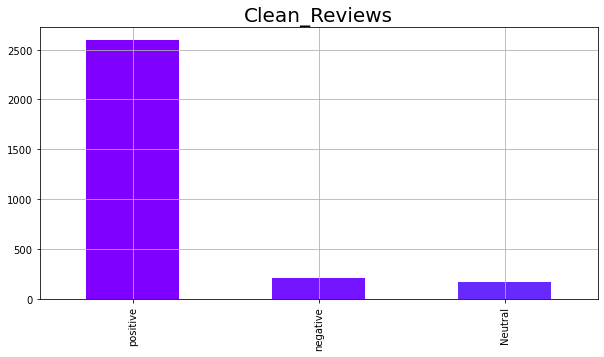

In [54]:
color = plt.cm.rainbow(np.linspace(0, 1, 40))
final_30['Classification'].value_counts().head(10).plot.bar(color = color, figsize=(10,5))
plt.title('Clean_Reviews', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
#plt.savefig('Reviwes.png', dpi=300, bbox_inches='tight')
plt.show()